# Visualizing the OLS cost function, L1, L2 constraints

Starter code for the Q3

**Q3.2** By observing the output of the plot below, we can conclude that the statement given in question is **true**

#### Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

#### Creating the data set

In [2]:
#Creating the dataset (as previously)
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

#### Helper functions

In [3]:
''' Complete the cell '''
#### HINT: Write the closed form function for OLS, Ridge and coordinate descent function for Lasso 
#### Each function must depend on the variable lambda
# Getting optimal values of w using closed-form solution for OLS
def costfunction(X, y, W):
    '''Cost function for linear regression'''
    #Initialization of useful values 
    m = np.size(y)
    
    #Vectorized implementation
    h = X @ W
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J

def cost_l2(x,y):
    '''L2 cost functiom'''
    return x**2 + y**2

def cost_l1(x,y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)

def ols_closed_form(X_train, Y_train):
    w = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ Y_train
    return w

def ridge_regression_closed_form(X_mat, Y_vec, lamda=10):
    '''Closed-form solution of Ridge regression'''
    m, n = X_mat.shape
    I = np.eye((n))
    w =  np.linalg.inv(X_mat.T @ X_mat + lamda * I) @ X_mat.T @ Y_vec
    return w

def soft_threshold(rho, lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0

def coordinate_descent_lasso(W, X, y, lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize w_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ W
            rho = X_j.T @ (y - y_pred  + W[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    W[j] =  rho 
                else:
                    W[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                W[j] =  soft_threshold(rho, lamda)   
            
    return W.flatten()


#### Computing the Ridge regularization solutions as a function of $\lambda$

In [4]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the ridge regression function
#### and store optimal w for each lambda

lambda_range = np.logspace(0,4,num = 100)/1000

W0_list_ridge = []
W1_list_ridge = []

for l in lambda_range:
    w0, w1 = ridge_regression_closed_form(X,y_noise,l)
    W0_list_ridge.append(w0)
    W1_list_ridge.append(w1)

#### Computing the Lasso regularization solutions as a function of $\lambda$

In [5]:
''' Complete the cell '''
#### HINT: For the lambda range given below, call the lasso function
#### and store optimal w for each lambda. [You can alternatively use
#### SKLearn for this excercise to compute Lasso]

lambda_range = np.logspace(0,2,num = 100)/1000

W0_list_lasso = []
W1_list_lasso = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    w0, w1 = model_sk_reg.coef_
    W0_list_lasso.append(w0)
    W1_list_lasso.append(w1)

#### Plotting the results

<ipython-input-6-8f216d07d123>:27: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
<ipython-input-6-8f216d07d123>:28: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
<ipython-input-6-8f216d07d123>:48: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
<ipython-input-6-8f216d07d123>:49: UserWarning: The following kwargs were not used by contour: 'label'
  ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')


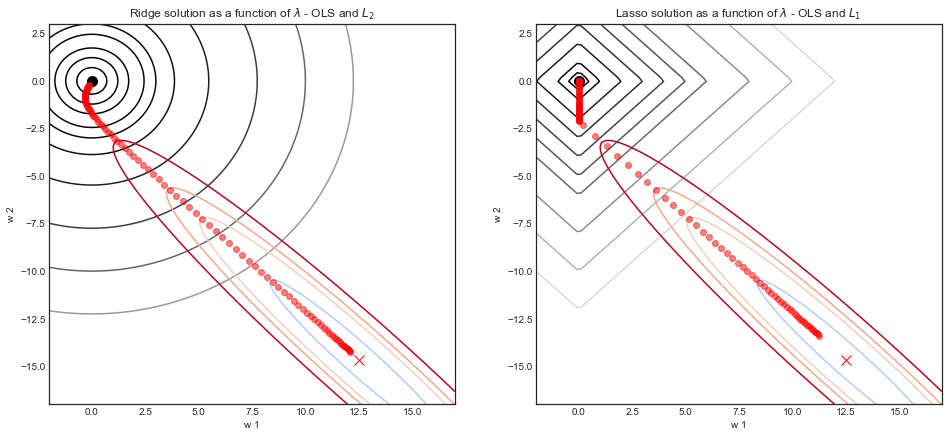

In [6]:
''' Complete the cell '''

#Setup of meshgrid of w values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each w combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T @ X) @X.T @ y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L2 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##
ax.plot(W0_list_ridge,W1_list_ridge, linestyle = 'none', marker = 'o', color = 'red', alpha = 0.5)
###############################################


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.set_xlabel('w 1')
ax.set_ylabel('w 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

###############################################
''' FILL THIS CODE '''
#Plotting the path of L1 regularized minimum
#### HINT: plot w_0 & w_1 list corresponding to each value of lambda
## Your code below ##
ax.plot(W0_list_lasso,W1_list_lasso, linestyle = 'none', marker = 'o', color = 'red', alpha = 0.5)
###############################################


plt.show()


**Q3.2** By observing the output of the plot below, we can conclude that the statement given in question is **true**
